# Best probability density distribution to describe the residuals of the CO$_2$ time series.

This notebook selects the 5 best distributions that fit the residuals for each site and height. Then, it selects the most common pdf describing the data. It uses the Fitter( ) library that supports 80 distributions.

https://fitter.readthedocs.io/_/downloads/en/latest/pdf/

## Libraries

In [3]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from fitter import Fitter, get_common_distributions, get_distributions

## Paths

In [4]:
pathr='/home/_ehoyos/Documents/Data_CO2/Final_info/' # path to read the data.
paths='/home/_ehoyos/Documents/Data_CO2/Final_results/' # path to save the results.

### Procedure

i=46 HEL
k=0 HEL


/home/_ehoyos/snap/jupyter/common/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/home/_ehoyos/snap/jupyter/common/lib/python3.7/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
/home/_ehoyos/snap/jupyter/common/lib/python3.7/site-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)


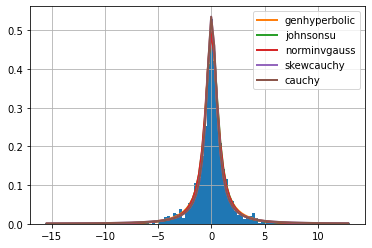

In [5]:
# Read data
res='add'
filesf=glob.glob(pathr+"/*.csv")
namesf=["" for i in range(len(filesf))] # names of ICOS sites.
for i in range(len(filesf)):
    namesf[i]=filesf[i].split('/')[len(filesf[i].split('/'))-1].split('.')[0].split('_')[0]  
bm_s=[]
info_bm=[]

for ii in range(46,47):    
#for ii in range(len(namesf)):#=====================================================>>>>>>
    print('i='+str(ii),namesf[ii])
    info_model=[]
    bm=[]
    w=namesf.index(namesf[ii])
    dataf=pd.read_csv(filesf[w],skiprows=11)
    line=open(filesf[w], "r").readlines()[0:8]
    code=line[1].split(',')[1].strip()
    site=line[0].split(',')[1].strip()
    code=line[1].split(',')[1].strip()
    country=line[2].split(',')[1].strip()
    latitude=line[3].split(',')[1].strip()
    longitude=line[4].split(',')[1].strip()
    altitude=line[5].split(',')[1].strip()
    units=line[6].split(',')[1].strip()
    nHeights=int(line[7].split(',')[1].strip())
    dataf["date"]=pd.to_datetime(dataf["date"])
    titlesr=dataf.columns[7+4*nHeights:7+4*nHeights+2*nHeights]
    if res=='add':titlesr=titlesr[:nHeights]
    if res=='mul':titlesr=titlesr[nHeights:]
    titles2=dataf.columns[7:7+nHeights] # columns of data for each height.
    titles=dataf.columns.values.tolist()
    
    for k in range(nHeights):  
        print('k='+str(k),namesf[ii])
        var=dataf[titlesr[k]].values
        varf=[x for x in var if math.isnan(x) == False]
        f=Fitter(varf)
        f.fit()
        f.summary()
        a=f.summary()[0:6].index
        a1=a.tolist()
        info=np.append(titlesr[k],a1)
        info_model.append(info)
        bm.append(a1)
        
    info_model_db=pd.DataFrame(info_model,columns=['Height','d1','d2','d3','d4','d5'])
    info_model_db.to_csv(paths+code+'_best_pdf.csv',header=True)
#select and save the best 5 distributions of each site and save them in a .csv file.
# the last line contains the best 5 distributions considerig all sites.  
    values,counts=np.unique(bm,return_counts=True)
    ind=np.argsort(-1*counts)[:5]
    val=values[ind]
    bm_s.append(val)
    info=np.append([code],val)
    info_bm.append(info)
    
## 5 best models considering all sites.    
values,counts=np.unique(bm_s,return_counts=True)    
ind=np.argsort(-1*counts)[:5]
best=values[ind]
count=counts[ind]

info=np.append(['all sites'],best)
info_bm.append(info)
info=np.append(['count'],count)
info_bm.append(info)

best_models_db=pd.DataFrame(info_bm,
            columns=['Site','d1','d2','d3','d4','d5'])
best_models_db.to_csv(paths+'zBest_pdf_all.csv',header=True)
    